# Python Amazon KPI analysis

![Alt text](https://www.jeffbullas.com/wp-content/uploads/2021/09/DALL%C2%B7E-2024-07-05-20.46.06-A-vibrant-engaging-landscape-image-for-a-blog-titled-How-to-Earn-Money-from-Amazon.-The-image-should-include-various-Amazon-related-elements-such-a.webp)

# 1. Data collection-

In this project, I focused on analyzing e-commerce, a rapidly growing and evolving industry. By examining sales data from Amazon, an industry giant, I aimed to uncover key insights that could optimize strategies for new and aspiring e-commerce businesses. Analyzing this data helps understand trends that are invaluable for decision-making and business growth.

The dataset I used was scraped from Amazon’s site by [Ahmed Abdelrazek](https://www.kaggle.com/datasets/ahmedsayed564/amazon-sales-dataset). To begin, I previewed the data to identify potential key insights and determined the necessary data cleaning steps to ensure the analysis would yield meaningful results.

In [2]:
# Imports pandas library
import pandas as pd

# Reads the data frame
df = pd.read_csv('raw_amazon_data.csv')
  
# Displays the first 5 rows
df.head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,₹507,"₹1,208",58%,4.1,"8,131",Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/I/31+NwZ8gb1...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
1,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,₹507,"₹1,208",58%,4.1,"8,131",Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
2,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,₹749,"₹1,339",44%,4.2,"1,79,692",150 Mbps Wi-Fi —— Exceptional wireless speed u...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/I/31Wb+A3VVd...,https://www.amazon.in/TP-Link-TL-WN722N-150Mbp...
3,B003B00484,Duracell Plus AAA Rechargeable Batteries (750 ...,Electronics|GeneralPurposeBatteries&BatteryCha...,₹399,₹499,20%,4.3,"27,201",Duracell Rechargeable AAA 750mAh batteries sta...,"AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQZ...","T N Sivaji,Akku,V,Meet,MOHAMMED,Niranjan koyri...","R5L3FAFS6JXJF,R1VTQ25LXQX5UD,R6RJYAZUM5240,R1S...","Works Good,Perfect replacement cell for trimme...","Works good,Bought it to replace my Phillips QT...",https://m.media-amazon.com/images/I/418YrbHVLC...,https://www.amazon.in/Duracell-AAA-750mAh-Rech...
4,B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",Computers&Accessories|Accessories&Peripherals|...,₹279,₹375,26%,4.3,"31,534","A comfortable, ambidextrous shape feels good i...","AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...","Uday Joglekar,Simi Singh,Hi,chirag bansal,Swar...","R3U9FRV2Q625DO,R3EJZ83W9OHW3D,RSH53O0JL66NL,R3...","Handy Mouse,Good quality mouse,Good one.,Good,...","Liked this Product,https://m.media-amazon.com/...",https://m.media-amazon.com/images/I/31iFF1Kbkp...,https://www.amazon.in/Logitech-B100-Optical-Mo...


In [3]:
#checks the number of rows and columns
print(f"The number of rows are {df.shape[0]}, and the number of columns are {df.shape[1]}.")

The number of rows are 1465, and the number of columns are 16.


In [4]:
#Lists the names of columns
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [5]:
#Checks for null entries
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [6]:
#states column datatypes and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

**What this preview tells us about this data frame-**

1. There are 1465 rows and 16 columns.

2. The columns in the datasets are: 'product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link'.

3. There a 2 null entries that I will tackle later on

4. The data type of all the columns are object.

# 2. Defining the problems/ goals-

  Looking at this data (primarily the columns), the ideal key insights to extract would be-

1. What is the relationship between discounts and product ratings? Analyze how discount percentages correlate with product ratings. Are products with higher discounts rated better or worse?

2. Which categories have the highest-rated products?
Investigate which product categories receive the highest ratings overall.

3. What impact do discounts have on the number of reviews?
Explore how discounts influence customer engagement. Are heavily discounted products receiving more reviews or attention?

4. What is the price distribution of highly-rated products?
Examine the price ranges of products with the highest ratings. Do customers prefer more expensive, discounted, or mid-range products?

**The libraries that will perform these tasks-**

1. Pandas: Load data, clean it, and perform preliminary analysis.
2. NumPy: Perform mathematical operations and handle arrays.
3. Matplotlib: Create basic plots and visualizations.
4. Seaborn: Create detailed and visually appealing charts.
5. SciPy: Perform statistical tests and analysis.

In [7]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# this is for jupyter notebook to show plots in the notebook itself instead of opening a new window
%matplotlib inline

# 3. Data cleaning-

This data is fairly clean, it just needs unnecessary columns to be removed and formatting transformed to make answering our questions easier. So without wasting any time at all, I went straight to extracting the key insights.

For this task, I chose Python over Excel because Python offers more powerful data cleaning capabilities through libraries like Pandas, which provide efficient and flexible methods for data manipulation. Python allows for automated and reproducible cleaning processes, which is more scalable compared to manual adjustments in Excel, especially for large datasets.

In [8]:
# Counts the number of duplicate rows
duplicate_count = df.duplicated().sum()

# Drops any duplicate rows if present
if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows have been removed.")
else:
    print("No duplicate rows found.")


No duplicate rows found.


In [9]:
# Drops irrelevant columns
df = df.drop(columns=['about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link'])

# Shows the updated DataFrame
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,₹507,"₹1,208",58%,4.1,"8,131"
1,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,₹507,"₹1,208",58%,4.1,"8,131"
2,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,₹749,"₹1,339",44%,4.2,"1,79,692"
3,B003B00484,Duracell Plus AAA Rechargeable Batteries (750 ...,Electronics|GeneralPurposeBatteries&BatteryCha...,₹399,₹499,20%,4.3,"27,201"
4,B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",Computers&Accessories|Accessories&Peripherals|...,₹279,₹375,26%,4.3,"31,534"


In [10]:
# # Converts to appropriate data types

# # Remove currency symbols, commas, then convert to float
# df['discounted_price'] = df['discounted_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)
# df['actual_price'] = df['actual_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)

# # Remove commas, replace NaN with blank, then convert to integer
# df['rating_count'] = df['rating_count'].replace({',': ''}, regex=True).fillna('').astype(str)
# df['rating_count'] = df['rating_count'].replace('', '0').astype(int)

# # Converts to string
# df['product_name'] = df['product_name'].astype(str)
# df['product_id'] = df['product_id'].astype(str)

# # Converts to float
# df['rating'] = df['rating'].astype(float)

# # Converts to category
# df['category'] = df['category'].astype('category')

# # Converts to percentage (decimal)
# df['discount_percentage'] = df['discount_percentage'].str.rstrip('%').astype(float) / 100

# # Checks the data frame types
# print(df.dtypes)

This code above show an error: ValueError: could not convert string to float: '|'

According to this error, in one of the entries under the 'rating' column, theres a  '|' instead of an actual  number so let us get that fixed so we can continue.

In [11]:
# Checks for the '|' character
df.query('rating == "|"')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count
720,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...","₹2,099","₹2,499",16%,|,992


I searched the actual Amazon site with the corresponding product_id and found that the rating is actually [3.9](https://www.amazon.com.au/Eureka-Forbes-Powerful-Washable-Accessories/dp/B08L12N5H1) so let's fix this.

In [12]:
#Converts '|' to 3.9 and changes the data type to float
df['rating'] = df['rating'].str.replace('|', '3.9').astype('float64')

Now let us run that previous code again to test if it is fixed

In [13]:
# Converts to appropriate data types

# Remove currency symbols, commas, then convert to float
df['discounted_price'] = df['discounted_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)
df['actual_price'] = df['actual_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)

# Remove commas, replace NaN with blank, then convert to integer
df['rating_count'] = df['rating_count'].replace({',': ''}, regex=True).fillna('').astype(str)
df['rating_count'] = df['rating_count'].replace('', '0').astype(int)

# Converts to string
df['product_name'] = df['product_name'].astype(str)
df['product_id'] = df['product_id'].astype(str)

# Converts to float
df['rating'] = df['rating'].astype(float)

# Converts to category
df['category'] = df['category'].astype('category')

# Converts to percentage (decimal)
df['discount_percentage'] = df['discount_percentage'].str.rstrip('%').astype(float) / 100

# Checks the data frame types
print(df.dtypes)

product_id               object
product_name             object
category               category
discounted_price        float64
actual_price            float64
discount_percentage     float64
rating                  float64
rating_count              int32
dtype: object


Now, the data has been cleaned, I checked for duplicate entries, removed irrelevant columns, dealt with strange entries, and transformed the data types for my use. Now I started extracting insights and visualize them.

   # First question-

1. What is the relationship between discounts and product ratings? Analyze how discount percentages correlate with product ratings. Are products with higher discounts rated better or worse?

To analyze the relationship between discount percentages and product ratings:

1. Visualization: I will create a scatter plot with a regression line to observe the trend between discount percentages and ratings.
2. Correlation Analysis: I will calculate the correlation coefficient to quantify the relationship. A positive value would indicate higher discounts are linked to higher ratings, while a negative value suggests the opposite.

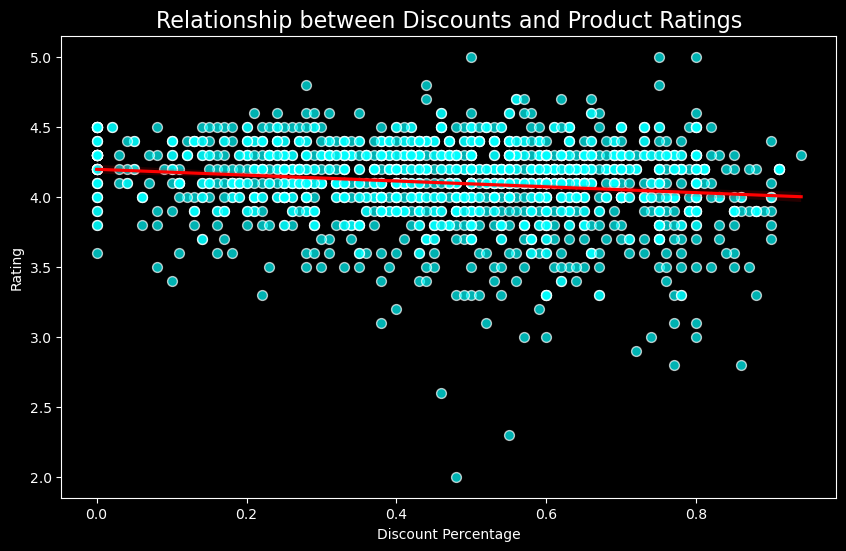

Correlation calculation between discount percentage and rating = -0.15


In [14]:
# Scatter plot with adjusted colors for dark background
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))

# Scatter plot with a lighter color and transparency for better visibility on dark background
sns.regplot(data=df, x='discount_percentage', y='rating',
            scatter_kws={'s': 50, 'color': 'cyan', 'alpha': 0.7, 'edgecolor': 'white'},  # Adjusted scatter settings
            line_kws={'color': 'red'})  # Line color

plt.title('Relationship between Discounts and Product Ratings', fontsize=16)
plt.xlabel('Discount Percentage')
plt.ylabel('Rating')

plt.show()

# Calculate correlation
correlation = df['discount_percentage'].corr(df['rating'])
print(f'Correlation calculation between discount percentage and rating = {correlation:.2f}')


**Conclusion-**

The analysis of the relationship between discount percentages and product ratings revealed a weak negative correlation of -0.15. This indicates that while there is a slight tendency for products with higher discounts to receive marginally lower ratings, the relationship is not strong. In other words, discounts do not have a significant impact on product ratings, suggesting that other factors are more influential in determining customer satisfaction.

# Second question-

2. Which categories have the highest-rated products?
Investigate which product categories receive the highest ratings overall. This could help identify top-performing categories.

To answer the question of which categories have the highest-rated products, we follow these steps:

Calculate the average rating for each category, sort it by descending order, and display the top 5 rated in a bar graph.

In [15]:
# Calculate average rating per category
category_ratings = df.groupby('category')['rating'].mean().reset_index()

# Sorts categories by average rating in descending order
sorted_category_ratings = category_ratings.sort_values(by='rating', ascending=False)

# Filters out the top 5 categories
top_5_categories = sorted_category_ratings.head(5)

print(top_5_categories)


                                              category  rating
57                       Computers&Accessories|Tablets     4.6
196  OfficeProducts|OfficeElectronics|Calculators|B...     4.5
175  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...     4.5
148  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...     4.5
48   Computers&Accessories|NetworkingDevices|Networ...     4.5


C:\Users\Owner\AppData\Local\Temp\ipykernel_10604\1280617113.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_ratings = df.groupby('category')['rating'].mean().reset_index()


C:\Users\Owner\AppData\Local\Temp\ipykernel_10604\4239178095.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_5_categories, y='category', x='rating', palette='Blues_r')


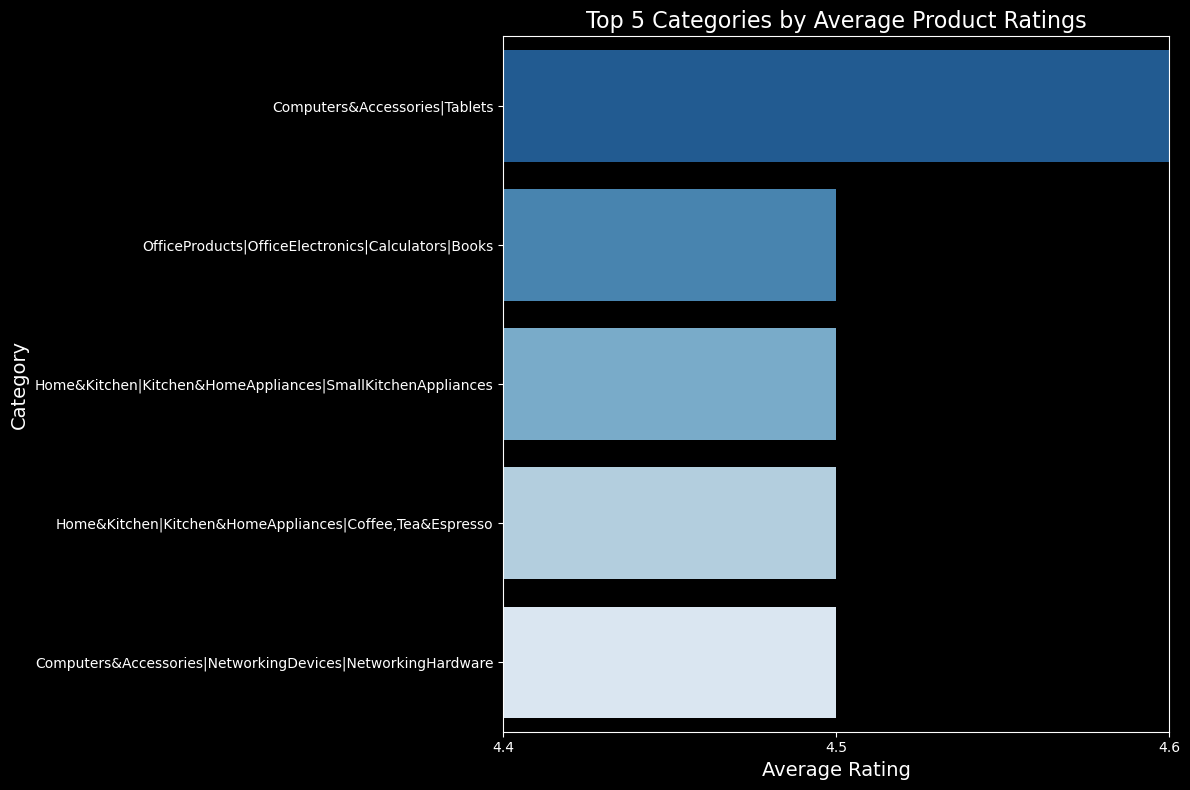

In [16]:
# creates a DataFrame with the top 5 categories and their ratings
top_5_categories = pd.DataFrame({
    'category': [
        'Computers&Accessories|Tablets',
        'OfficeProducts|OfficeElectronics|Calculators|Books',
        'Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances',
        'Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea&Espresso',
        'Computers&Accessories|NetworkingDevices|NetworkingHardware'
    ],
    'rating': [4.6, 4.5, 4.5, 4.5, 4.5]
})

# Create a horizontal bar plot of average ratings for the specified top 5 categories
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=top_5_categories, y='category', x='rating', palette='Blues_r')

# font sizes for the title, x-label, and y-label
plt.title('Top 5 Categories by Average Product Ratings', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Category', fontsize=14)

# Set x-axis limits and ticks
ax.set_xlim(4.4, 4.6)
ax.set_xticks([4.4, 4.5, 4.6])

# Adjust layout to ensure labels fit
plt.tight_layout()
plt.show()

**Conclusion-**

Based on the bar chart displaying the top 5 categories by average product ratings, we can identify which product categories receive the highest ratings overall. The categories with the highest average ratings are:

1. Computers&Accessories|Tablets - Average Rating: 4.6
2.  OfficeProducts|OfficeElectronics|Calculators|Books  - Average Rating: 4.5
3.  Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances  - Average Rating: 4.5
4.  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea&Espresso  - Average Rating: 4.5
5.  Computers&Accessories|NetworkingDevices|NetworkingHardware  - Average Rating: 4.5

These categories have the highest average ratings in the dataset, indicating that products in these categories generally receive the most favorable reviews.

# Third question-

3. What impact do discounts have on the number of reviews?
Explore how discounts influence customer engagement. Are heavily discounted products receiving more reviews or attention?

To explore how discounts influence the number of reviews:

1. Analysis:
   - Calculate the correlation between discount_percentage and rating_count.
   - Group products by discount ranges and find the average rating_count.

2. Visualization:
   - Scatter plot to show the relationship.
   - Box plot to display rating_count distribution across discount ranges.

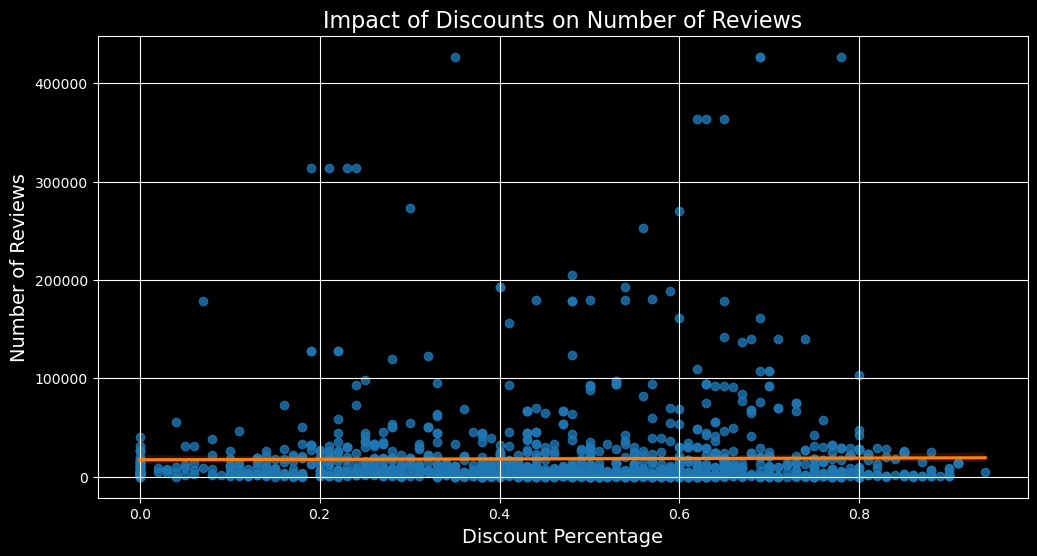

Correlation between discount percentage and number of reviews: 0.01


C:\Users\Owner\AppData\Local\Temp\ipykernel_10604\1556442207.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_reviews = df.groupby('discount_range')['rating_count'].mean().reset_index()


  discount_range  rating_count
0           0-5%   9499.637931
1          5-10%  23162.937500
2         10-15%   9040.651163
3         15-20%  23632.122449
4         20-25%  31425.911765
5         25-30%  15474.153061
6           30%+  18221.218005


In [17]:
# Plots the relationship between discount percentage and number of reviews with a regression line
plt.figure(figsize=(12, 6))
sns.regplot(data=df, x='discount_percentage', y='rating_count', scatter_kws={'color':'#1f77b4'}, line_kws={'color':'#ff7f0e'})
plt.title('Impact of Discounts on Number of Reviews', fontsize=16)
plt.xlabel('Discount Percentage', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.grid(True)
plt.show()

# Calculate the correlation between discount_percentage and rating_count
correlation = df[['discount_percentage', 'rating_count']].corr().iloc[0, 1]
print(f"Correlation between discount percentage and number of reviews: {correlation:.2f}")

# Define discount ranges
bins = [0, 5, 10, 15, 20, 25, 30, 100]
labels = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25-30%', '30%+']
df['discount_range'] = pd.cut(df['discount_percentage'] * 100, bins=bins, labels=labels, right=False)

# Calculate average rating_count for each discount range
avg_reviews = df.groupby('discount_range')['rating_count'].mean().reset_index()
print(avg_reviews)

**Conclusion:**

The correlation between discount percentage and the number of reviews is 0.01, indicating a very weak positive relationship. This suggests that discount percentage has a minimal impact on the number of reviews.

 Discount Range Insights: 
-  0-5% Discount: Average reviews are approximately:
9,500.
-  5-10% Discount: Average reviews increase to about:
23,163.
-  10-15% Discount: Reviews drop to around:
9,041.
-  15-20% Discount: Average reviews rise again to approximately:
23,632.
-  20-25% Discount: Reviews peak at about:
31,426.
-  25-30% Discount: Average reviews decrease to around:
15,474.
-  30%+ Discount: Reviews are about:
18,221.

 Summary: 
Although the correlation is very weak, the average number of reviews tends to increase with higher discount percentages up to the 20-25% range. Beyond this range, the average reviews decrease, suggesting that the highest discounts don't necessarily lead to the highest number of reviews.

# Fourth question-

4. What is the price distribution of highly-rated products?
Examine the price ranges of products with the highest ratings. Do customers prefer more expensive, discounted, or mid-range products?

To answer this question, we follow these steps:

Filter Highly-Rated Products: Define what constitutes "highly-rated" (e.g., the top 5 rated). Filter our dataset to include only those products.

Visualize Price Distribution: Create a plot showing the distribution of prices for these highly-rated products. This will help us determine if customers prefer more expensive, discounted, or mid-range products.

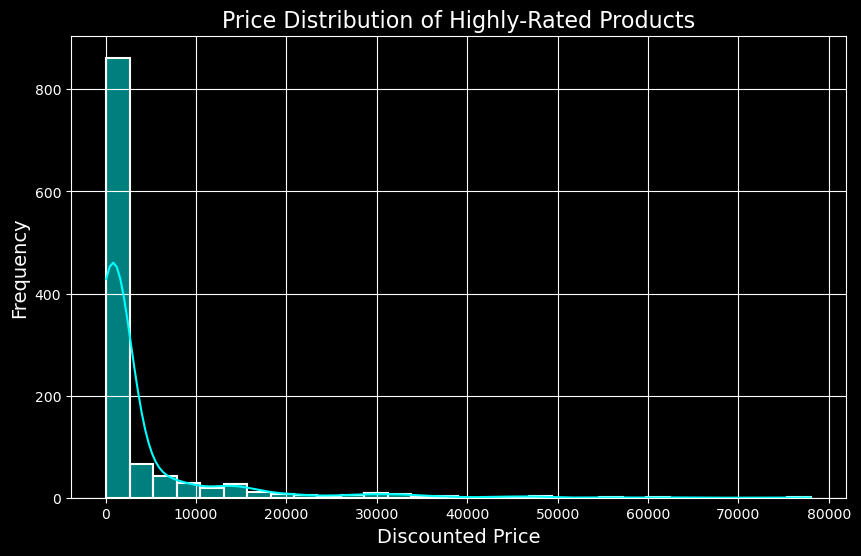

Mean Discounted Price: ₹3583.69
Median Discounted Price: ₹812.00
Mode of Discounted Price: ₹199.00


In [18]:
# Filter for highly-rated products
high_rated_df = df[df['rating'] >= 4]

# Plot price distribution with improved styling
plt.figure(figsize=(10, 6))
sns.histplot(high_rated_df['discounted_price'], kde=True, color='cyan', bins=30, 
             edgecolor='white', linewidth=1.5)  # Adjusted color and edge settings

plt.title('Price Distribution of Highly-Rated Products', fontsize=16)
plt.xlabel('Discounted Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)

plt.show()

# Calculate key statistics
price_mean = high_rated_df['discounted_price'].mean()
price_median = high_rated_df['discounted_price'].median()
price_mode = high_rated_df['discounted_price'].mode()[0]

# Summary of findings
print(f"Mean Discounted Price: ₹{price_mean:.2f}")
print(f"Median Discounted Price: ₹{price_median:.2f}")
print(f"Mode of Discounted Price: ₹{price_mode:.2f}")

**Conclusion:**

The price distribution suggests that most highly-rated products are priced on the lower end, as indicated by:

1.  Mean Discounted Price: ₹3,583.69 (indicating some expensive products skew the average).
2.  Median Discounted Price : ₹812.00 (most products are mid-range or lower-priced).
3.  Mode Discounted Price : ₹199.00 (the majority of products are very low-cost).

Customers seem to favor highly-rated products that are  affordable  or  heavily discounted . Although there are some expensive products, the bulk of highly-rated products are  concentrated in the lower price range , with ₹199.00 being the most common price point. This implies that affordability plays a key role in customer ratings.

# Summary:

The analysis of the dataset provides insights into various key factors that affect customer ratings, engagement, and pricing trends.

1.  Relationship Between Discounts and Product Ratings :
   -  Conclusion : A weak negative correlation (-0.15) between discount percentages and product ratings suggests that discounts have a minimal impact on ratings. Products with higher discounts tend to receive slightly lower ratings, but the effect is not significant, indicating that other factors influence customer satisfaction more than discounts.

2.  Categories with the Highest-Rated Products :
   -  Conclusion : The top-rated product categories are:
     - *Computers & Accessories | Tablets* – Average Rating: 4.6
     - *Office Products | Office Electronics | Calculators | Books* – Average Rating: 4.5
     - *Home & Kitchen | Small Kitchen Appliances* – Average Rating: 4.5
     - *Home & Kitchen | Coffee, Tea & Espresso* – Average Rating: 4.5
     - *Computers & Accessories | Networking Hardware* – Average Rating: 4.5
     
     These categories consistently receive the highest ratings, indicating strong customer satisfaction in these segments.

3.  Impact of Discounts on the Number of Reviews :
   -  Conclusion : There is a very weak positive correlation (0.01) between discount percentage and the number of reviews. However, certain discount ranges (especially 20-25%) attract more reviews, peaking at around 31,426 reviews. Discounts above 25% tend to decrease engagement, suggesting that extremely high discounts don’t necessarily translate to higher customer engagement.

4.  Price Distribution of Highly-Rated Products :
   -  Conclusion : The price distribution of top-rated products shows a significant preference for affordable and discounted items. While the mean price is ₹3,583.69, the median price is ₹812.00, and the mode is ₹199.00, indicating that most highly-rated products fall in the lower price range. Customers appear to prefer more affordable products, with very few high-priced items receiving top ratings.

Overall, while discounts and pricing play a role in customer behavior, factors like product category and inherent quality seem to have a more substantial impact on ratings and engagement.

# Thank you for your time

If you have any suggestions to what I should add or edit to this project feel free to comment on it, I will accredit any suggestions if so desired.  Any input is appreciated.

In [19]:
# End results of the table

from IPython.display import display, HTML

# Define CSS for scrollable table
styles = """
<style>
    .scrollable-table {
        max-height: 500px;  /* Adjust height as needed */
        overflow-y: auto;
        display: block;
        border: 1px solid #ddd;
    }
    .scrollable-table table {
        width: 100%;
        border-collapse: collapse;
    }
    .scrollable-table th, .scrollable-table td {
        border: 1px solid #ddd;
        padding: 8px;
    }
    .scrollable-table th {
        background-color: #f4f4f4;
    }
</style>
"""

# Convert DataFrame to HTML with CSS styling
html = df.to_html(classes='scrollable-table')

# Display the DataFrame with custom scrollable styling
display(HTML(styles + html))

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,discount_range
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adapter (Black),Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters,507.00,1208.00,0.58,4.1,8131,30%+
1,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adapter (Black),Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters,507.00,1208.00,0.58,4.1,8131,30%+
2,B002SZEOLG,"TP-Link Nano USB WiFi Dongle 150Mbps High Gain Wireless Network Wi-Fi Adapter for PC Desktop and Laptops, Supports Windows 10/8.1/8/7/XP, Linux, Mac OS X (TL-WN722N)",Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters,749.00,1339.00,0.44,4.2,179692,30%+
3,B003B00484,Duracell Plus AAA Rechargeable Batteries (750 mAh) Pack of 4,Electronics|GeneralPurposeBatteries&BatteryChargers|RechargeableBatteries,399.00,499.00,0.20,4.3,27201,20-25%
4,B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, 800 DPI Optical Tracking, Ambidextrous PC/Mac/Laptop - Black","Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice",279.00,375.00,0.26,4.3,31534,25-30%
5,B004IO5BMQ,"Logitech M235 Wireless Mouse, 1000 DPI Optical Tracking, 12 Month Life Battery, Compatible with Windows, Mac, Chromebook/PC/Laptop","Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice",699.00,995.00,0.30,4.5,54405,30%+
6,B005FYNT3G,SanDisk Cruzer Blade 32GB USB Flash Drive,Computers&Accessories|ExternalDevices&DataStorage|PenDrives,289.00,650.00,0.56,4.3,253105,30%+
7,B005LJQMCK,"BlueRigger Digital Optical Audio Toslink Cable (3.3 Feet / 1 Meter) With 8 Channel (7.1) Audio Support (for Home Theatre, Xbox, Playstation etc.)","Electronics|HomeTheater,TV&Video|Accessories|Cables|OpticalCables",416.00,599.00,0.31,4.2,30023,30%+
8,B005LJQMZC,"BlueRigger Digital Optical Audio Toslink Cable (6 Feet / 1.8 Meter) With 8 Channel (7.1) Audio Support (for Home Theatre, Xbox, Playstation etc.)","Electronics|HomeTheater,TV&Video|Accessories|Cables|OpticalCables",486.00,1999.00,0.76,4.2,30023,30%+
9,B006LW0WDQ,Amazon Basics 16-Gauge Speaker Wire - 50 Feet,"Electronics|HomeTheater,TV&Video|Accessories|Cables|SpeakerCables",399.00,795.00,0.50,4.4,12091,30%+
